<a href="https://colab.research.google.com/github/taaha3244/python-libraries/blob/main/Housing_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
# Import necessary libraries
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
file_path = 'housing.csv'  # Update this path if necessary
df = pd.read_csv(file_path)



In [34]:
df.shape

(20640, 12)

In [3]:
# Display the first few rows of the dataframe
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
df.describe(include='object').T

,count,unique,top,freq
ocean_proximity,20640,5,<1H OCEAN,9136


In [12]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [14]:
cat_columns = df.select_dtypes(include='object').columns
cat_columns

Index(['ocean_proximity'], dtype='object')

In [15]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
duplicates

0

In [16]:
# Display unique values for each categorical column
for col in cat_columns:
    unique_values = df[col].unique()
    print(f"{col}: {unique_values}")

ocean_proximity: ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


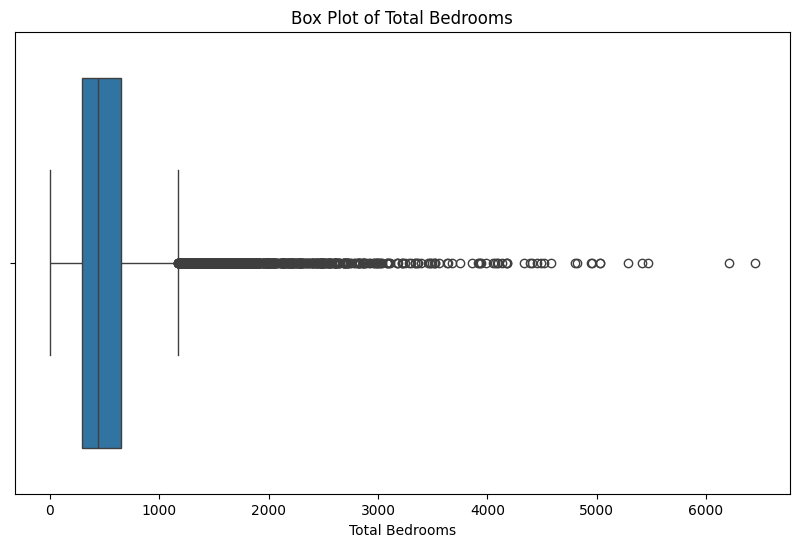

In [33]:
from scipy.stats import zscore

# Create a box plot for 'total_bedrooms'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['total_bedrooms'])
plt.title('Box Plot of Total Bedrooms')
plt.xlabel('Total Bedrooms')
plt.show()

In [35]:
# Calculate the median of the 'total_bedrooms' column
median_total_bedrooms = df['total_bedrooms'].median()

# Fill the missing values with the median
df['total_bedrooms'].fillna(median_total_bedrooms, inplace=True)

In [37]:
# Calculate summary statistics for 'total_bedrooms'
total_bedrooms_stats = df['total_bedrooms'].describe()

# Calculate the IQR
Q1 = df['total_bedrooms'].quantile(0.25)
Q3 = df['total_bedrooms'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
iqr_outliers = df[(df['total_bedrooms'] < lower_bound) | (df['total_bedrooms'] > upper_bound)]

# Re-evaluate Z-scores
df['z_score_total_bedrooms'] = zscore(df['total_bedrooms'])
z_score_outliers = df[(df['z_score_total_bedrooms'] > 3) | (df['z_score_total_bedrooms'] < -3)]

total_bedrooms_stats, lower_bound, upper_bound, iqr_outliers.shape[0], z_score_outliers.shape[0]

(count    20640.000000
 mean       536.838857
 std        419.391878
 min          1.000000
 25%        297.000000
 50%        435.000000
 75%        643.250000
 max       6445.000000
 Name: total_bedrooms, dtype: float64,
 -222.375,
 1162.625,
 1306,
 375)

In [36]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
age_binned            0
income_quantiles      0
dtype: int64

In [19]:
# Sort values in the 'price' column in ascending order
sorted_df = df.sort_values(by='median_income', ascending=False)

# Display the first few rows of the sorted dataframe
sorted_df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4352,-118.37,34.10,37.0,407.0,67.0,100.0,47.0,15.0001,500001.0,<1H OCEAN
10673,-117.85,33.62,13.0,5192.0,658.0,1865.0,662.0,15.0001,500001.0,<1H OCEAN
8849,-118.40,34.08,52.0,3815.0,439.0,1266.0,413.0,15.0001,500001.0,<1H OCEAN
4606,-118.33,34.07,52.0,1482.0,171.0,531.0,161.0,15.0001,500001.0,<1H OCEAN
5257,-118.49,34.06,42.0,2861.0,360.0,829.0,310.0,15.0001,500001.0,<1H OCEAN


In [21]:
# Select rows 10 to 20 and columns 3 to 5
sliced_df = df.iloc[10:21, 3:6]
sliced_df


,total_rooms,total_bedrooms,population
10,2202.0,434.0,910.0
11,3503.0,752.0,1504.0
12,2491.0,474.0,1098.0
13,696.0,191.0,345.0
14,2643.0,626.0,1212.0
15,1120.0,283.0,697.0
16,1966.0,347.0,793.0
17,1228.0,293.0,648.0
18,2239.0,455.0,990.0
19,1503.0,298.0,690.0


In [22]:
# Select rows 10 to 20 and columns 'total_rooms', 'total_bedrooms'
loc_df = df.loc[10:20, ['total_rooms', 'total_bedrooms']]
loc_df


,total_rooms,total_bedrooms
10,2202.0,434.0
11,3503.0,752.0
12,2491.0,474.0
13,696.0,191.0
14,2643.0,626.0
15,1120.0,283.0
16,1966.0,347.0
17,1228.0,293.0
18,2239.0,455.0
19,1503.0,298.0


In [23]:
# Select the first 10 rows and the first 5 columns
iloc_df = df.iloc[:10, :5]
iloc_df


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms
0,-122.23,37.88,41.0,880.0,129.0
1,-122.22,37.86,21.0,7099.0,1106.0
2,-122.24,37.85,52.0,1467.0,190.0
3,-122.25,37.85,52.0,1274.0,235.0
4,-122.25,37.85,52.0,1627.0,280.0
5,-122.25,37.85,52.0,919.0,213.0
6,-122.25,37.84,52.0,2535.0,489.0
7,-122.25,37.84,52.0,3104.0,687.0
8,-122.26,37.84,42.0,2555.0,665.0
9,-122.25,37.84,52.0,3549.0,707.0


In [25]:
# Select rows where 'median_house_value' is greater than 50000
boolean_df = df[df['median_house_value'] > 50000]
boolean_df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [26]:
# Select rows where 'median_house_value' is greater than 50000 and 'housing_median_age' is less than 30
conditional_df = df[(df['median_house_value'] > 50000) & (df['housing_median_age'] < 30)]
conditional_df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
50,-122.27,37.82,21.0,896.0,453.0,735.0,438.0,0.9218,171900.0,NEAR BAY
59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY
70,-122.29,37.81,26.0,768.0,152.0,392.0,127.0,1.7719,82500.0,NEAR BAY
74,-122.29,37.81,20.0,835.0,161.0,290.0,133.0,2.4830,137500.0,NEAR BAY


In [27]:
# Group by 'ocean_proximity' and calculate the mean for each group
grouped_by_ocean_proximity = df.groupby('ocean_proximity').mean()
grouped_by_ocean_proximity

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,,,
<1H OCEAN,-118.847766,34.560577,29.279225,2628.343586,546.539185,1520.290499,517.744965,4.230682,240084.285464
INLAND,-119.732990,36.731829,24.271867,2717.742787,533.881619,1391.046252,477.447565,3.208996,124805.392001
ISLAND,-118.354000,33.358000,42.400000,1574.600000,420.400000,668.000000,276.600000,2.744420,380440.000000
NEAR BAY,-122.260694,37.801057,37.730131,2493.589520,514.182819,1230.317467,488.616157,4.172885,259212.311790
NEAR OCEAN,-119.332555,34.738439,29.347254,2583.700903,538.615677,1354.008653,501.244545,4.005785,249433.977427


In [28]:
# Group by 'housing_median_age' and calculate the sum of 'total_rooms' and 'total_bedrooms'
grouped_by_age_sum = df.groupby('housing_median_age')[['total_rooms', 'total_bedrooms']].sum()
grouped_by_age_sum

,total_rooms,total_bedrooms
housing_median_age,,
1.0,4405.0,688.0
2.0,320757.0,52998.0
3.0,443925.0,76472.0
4.0,1191321.0,211478.0
5.0,1224467.0,226467.0
6.0,726625.0,135649.0
7.0,950376.0,172031.0
8.0,821853.0,155131.0
9.0,785483.0,147406.0


In [29]:
# Group by 'median_income' and calculate the maximum 'median_house_value'
grouped_by_income_max_value = df.groupby('median_income')['median_house_value'].max()
grouped_by_income_max_value

median_income
0.4999     500001.0
0.5360     375000.0
0.5495      91700.0
0.6433     111300.0
0.6775     350000.0
             ...   
14.4219    500001.0
14.5833    500001.0
14.9009    500001.0
15.0000    500001.0
15.0001    500001.0
Name: median_house_value, Length: 12928, dtype: float64

In [30]:
# Binning the 'housing_median_age' into discrete intervals
bins = [0, 10, 20, 30, 40, 50, 60]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60']
df['age_binned'] = pd.cut(df['housing_median_age'], bins=bins, labels=labels)

# Display the first few rows with the new 'age_binned' column
df[['housing_median_age', 'age_binned']].head()


,housing_median_age,age_binned
0,41.0,40-50
1,21.0,20-30
2,52.0,50-60
3,52.0,50-60
4,52.0,50-60


In [31]:
# Binning the 'median_income' into 4 equal-sized bins based on quantiles
df['income_quantiles'] = pd.qcut(df['median_income'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Display the first few rows with the new 'income_quantiles' column
df[['median_income', 'income_quantiles']].head()


,median_income,income_quantiles
0,8.3252,Q4
1,8.3014,Q4
2,7.2574,Q4
3,5.6431,Q4
4,3.8462,Q3
